# Bayesian Networks


## Getting Started

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from apogee import pprint_marginals
from apogee.utils import draw_network
from apogee.models.discrete import BayesianNetwork, Variable

with BayesianNetwork() as net:
    net.add(Variable("cloudy", states=["true", "false"], 
                     parameters=[0.4, 0.6]))
    
    net.add(Variable("sprinkler", states=["true", "false"], parents=["cloudy"], 
                     parameters=[[0.1, 0.9],
                                 [0.7, 0.3]]))
    
    net.add(Variable("rain", states=["true", "false"], parents=["cloudy"], 
                     parameters=[[0.8, 0.2],
                                 [0.3, 0.7]]))
    
    net.add(Variable("wetgrass", states=["true", "false"], parents=["sprinkler", "rain"], 
                     parameters=[[0.9, 0.1],
                                 [0.4, 0.6],
                                 [0.7, 0.3],
                                 [0.1, 0.9]]))

## Making Predictions

In [2]:
net.predict()

{'cloudy': {'true': 0.39999998, 'false': 0.6},
 'sprinkler': {'true': 0.46, 'false': 0.54},
 'rain': {'true': 0.5, 'false': 0.5},
 'wetgrass': {'true': 0.5222, 'false': 0.47779998}}

In [3]:
pprint_marginals(net, net.predict())

cloudy
--------------------------------------------------
true: 40.0%
false: 60.0%
sprinkler | cloudy
--------------------------------------------------
true: 46.0%
false: 54.0%
rain | cloudy
--------------------------------------------------
true: 50.0%
false: 50.0%
wetgrass | sprinkler, rain
--------------------------------------------------
true: 52.22%
false: 47.78%
--------------------------------------------------


In [4]:
pprint_marginals(net, net.predict({"cloudy": "true"}))

cloudy
--------------------------------------------------
true: 100.0%
false: 0.0%
sprinkler | cloudy
--------------------------------------------------
true: 10.0%
false: 90.0%
rain | cloudy
--------------------------------------------------
true: 80.0%
false: 20.0%
wetgrass | sprinkler, rain
--------------------------------------------------
true: 52.22%
false: 47.78%
--------------------------------------------------


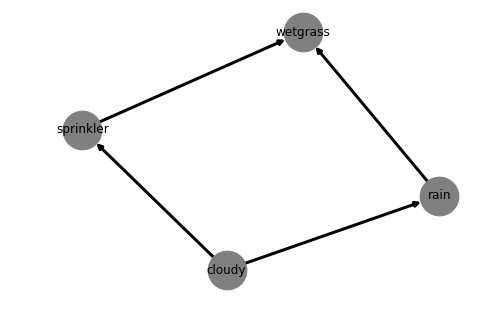

In [7]:
draw_network(net)

<hr>

# ALARM Network

In [8]:
alarm = BayesianNetwork.from_hugin("./data/alarm.net")
alarm.predict()["HISTORY"]

{'TRUE': 0.054500002, 'FALSE': 0.9455}

In [9]:
alarm = BayesianNetwork.from_json("./data/alarm.json")
alarm.predict()["HISTORY"]

{'TRUE': 0.0545, 'FALSE': 0.9455}

In [14]:
pprint_marginals(alarm, alarm.predict())

PAP | PULMEMBOLUS
--------------------------------------------------
LOW: 4.96%
NORMAL: 89.29%
HIGH: 5.75%
VENTLUNG | INTUBATION, KINKEDTUBE, VENTTUBE
--------------------------------------------------
ZERO: 74.26%
LOW: 22.0%
NORMAL: 1.164%
HIGH: 2.573%
SAO2 | PVSAT, SHUNT
--------------------------------------------------
LOW: 79.64%
NORMAL: 3.162%
HIGH: 17.2%
SHUNT | INTUBATION, PULMEMBOLUS
--------------------------------------------------
NORMAL: 89.69%
HIGH: 10.31%
HR | CATECHOL
--------------------------------------------------
LOW: 1.401%
NORMAL: 17.11%
HIGH: 81.49%
HREKG | ERRCAUTER, HR
--------------------------------------------------
LOW: 16.94%
NORMAL: 9.91%
HIGH: 73.15%
CVP | LVEDVOLUME
--------------------------------------------------
LOW: 11.43%
NORMAL: 73.11%
HIGH: 15.46%
KINKEDTUBE
--------------------------------------------------
TRUE: 4.0%
FALSE: 96.0%
BP | CO, TPR
--------------------------------------------------
LOW: 39.0%
NORMAL: 20.47%
HIGH: 40.53%
PULMEMBOLUS

In [11]:
%%timeit
alarm.predict()["HISTORY"]

61.5 ms ± 5.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


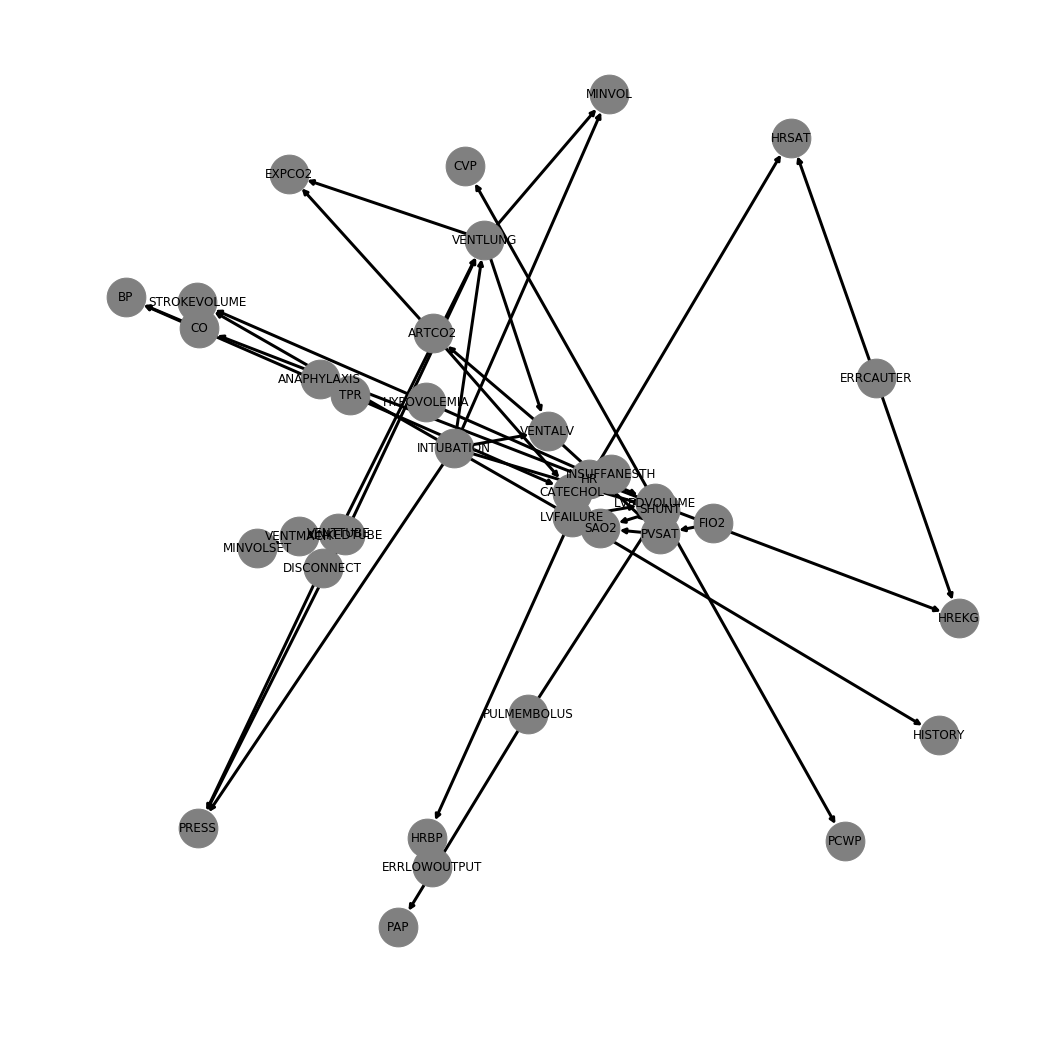

In [12]:
plt.figure(3, figsize=(14, 14))
draw_network(alarm, iterations=500, k=5)

<hr>

# MUNIN Network

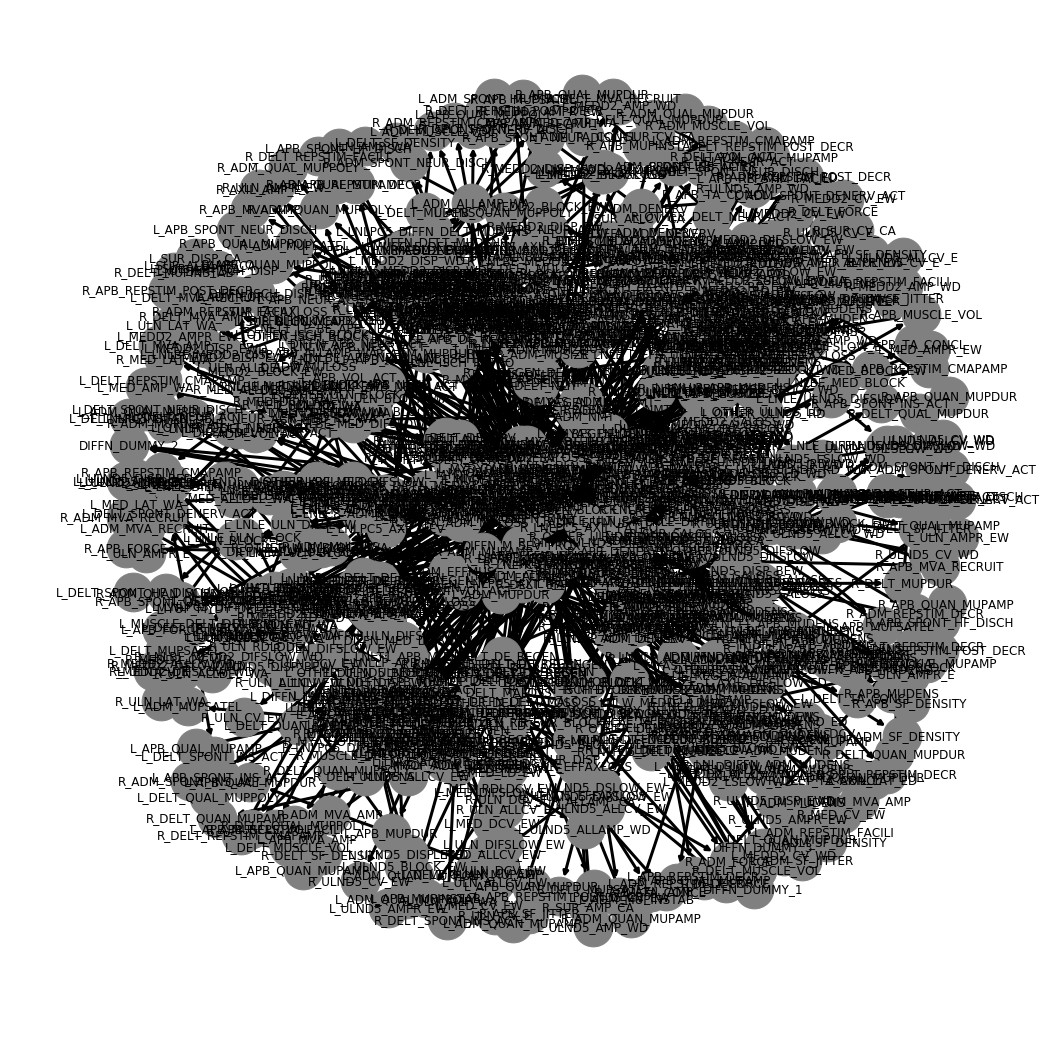

In [11]:
munin = BayesianNetwork.from_hugin("./data/munin.net")

plt.figure(3, figsize=(14, 14))
draw_network(munin, iterations=5, k=5)

In [12]:
len(munin)

1041

### Beware - This could take a while...

In [ ]:
munin.predict()